In [ ]:
# Load dataset
# Replace this with your local path or cloud download
data = pd.read_csv("your_dataset.csv")

In [ ]:
# Tensorflow 2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,...,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000,42415.000000
mean,0.562419,0.524767,0.974844,29.870258,0.473795,0.061959,0.147990,0.704963,0.610987,0.788825,...,0.094236,2.832677,3.760085,5.801391,0.252977,0.456914,8.573830,4.922079,5.697253,0.501191
std,0.496094,0.499392,0.156601,7.124854,0.499319,0.241084,0.355094,0.456065,0.487532,0.408147,...,0.292160,1.117507,8.143397,10.042378,0.434723,0.498146,2.852873,1.026750,2.173442,0.500004
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


This dataset contains 20 health-related features and a binary label indicating diabetes diagnosis. It includes 42,415 samples and requires normalization before training. All categorical features are already encoded; no missing values are present.


In [ ]:
labelencoder = LabelEncoder()
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Apply label encoding
for col in data.columns.values.tolist():
    if data[col].dtype == "object" or data[col].dtype == "bool":
        data[col] = labelencoder.fit_transform(data[col])

# Apply Min-Max scaling
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Reassign X and Y after normalization
X = data_normalized[:, 0:21]
Y = data_normalized[:, 21]


In [ ]:
#check everything is normalized
for i, col in enumerate(data.columns.values.tolist()):
    print(f"{col}: {data_normalized[:10, i]}")

HighBP: [1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
HighChol: [1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]
CholCheck: [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
BMI: [0.24418605 0.30232558 0.20930233 0.27906977 0.1744186  0.1627907
 0.12790698 0.34883721 0.15116279 0.15116279]
Smoker: [1. 0. 1. 0. 1. 1. 0. 1. 1. 0.]
Stroke: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
HeartDiseaseorAttack: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
PhysActivity: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Fruits: [1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]
Veggies: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
HvyAlcoholConsump: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AnyHealthcare: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
NoDocbcCost: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
GenHlth: [0.75 0.75 0.25 0.75 0.5  0.25 0.5  0.25 0.5  0.25]
MentHlth: [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
PhysHlth: [1.         0.         0.         0.5        0.         0.46666667
 0.06666667 0.         0.         0.        ]
DiffWalk: [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
Sex: [1. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
Age: [0.66666667 0.75       0.58333333 0.75      

In [ ]:
seed=123
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y)) #split dataset in training and test

Starting the the network analysis with just one layer, and the activation one.

Epoch 1/80
29/29 - 5s - loss: 0.6697 - acc: 0.5877 - 5s/epoch - 175ms/step
Epoch 2/80
29/29 - 0s - loss: 0.6218 - acc: 0.6656 - 42ms/epoch - 1ms/step
Epoch 3/80
29/29 - 0s - loss: 0.5899 - acc: 0.7007 - 43ms/epoch - 1ms/step
Epoch 4/80
29/29 - 0s - loss: 0.5697 - acc: 0.7165 - 43ms/epoch - 1ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5576 - acc: 0.7225 - 42ms/epoch - 1ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5502 - acc: 0.7273 - 44ms/epoch - 2ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5452 - acc: 0.7298 - 47ms/epoch - 2ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5417 - acc: 0.7320 - 45ms/epoch - 2ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5388 - acc: 0.7337 - 43ms/epoch - 1ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5365 - acc: 0.7350 - 42ms/epoch - 1ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5344 - acc: 0.7366 - 43ms/epoch - 1ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5326 - acc: 0.7377 - 45ms/epoch - 2ms/step
Epoch 13/80
29/29 - 0s - loss: 0.5310 - acc: 0.7380 - 49ms/epoch - 2ms/step
Epoch 14/80
29/29 - 0

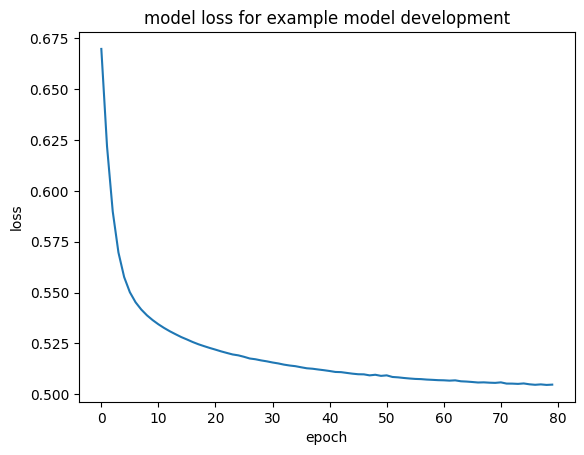

438/438 [==============================] - 1s 1ms/step - loss: 0.5071 - acc: 0.7519
Accuracy:  0.7519468665122986
438/438 [==============================] - 1s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4981  2001   6982
1.0        1471  5544   7015
All        6452  7545  13997



In [ ]:
#Network 1
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(10, input_dim=21, activation='relu'))
modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2) #start with small number of epochs to explore the network topology

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 - 1s - loss: 0.6900 - acc: 0.5434 - 721ms/epoch - 25ms/step
Epoch 2/80
29/29 - 0s - loss: 0.6798 - acc: 0.6057 - 50ms/epoch - 2ms/step
Epoch 3/80
29/29 - 0s - loss: 0.6570 - acc: 0.6724 - 49ms/epoch - 2ms/step
Epoch 4/80
29/29 - 0s - loss: 0.6150 - acc: 0.7023 - 45ms/epoch - 2ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5825 - acc: 0.7137 - 48ms/epoch - 2ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5657 - acc: 0.7210 - 49ms/epoch - 2ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5560 - acc: 0.7228 - 51ms/epoch - 2ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5498 - acc: 0.7256 - 50ms/epoch - 2ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5452 - acc: 0.7291 - 48ms/epoch - 2ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5418 - acc: 0.7301 - 47ms/epoch - 2ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5389 - acc: 0.7329 - 46ms/epoch - 2ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5366 - acc: 0.7344 - 58ms/epoch - 2ms/step
Epoch 13/80
29/29 - 0s - loss: 0.5346 - acc: 0.7351 - 52ms/epoch - 2ms/step
Epoch 14/80
29/29 -

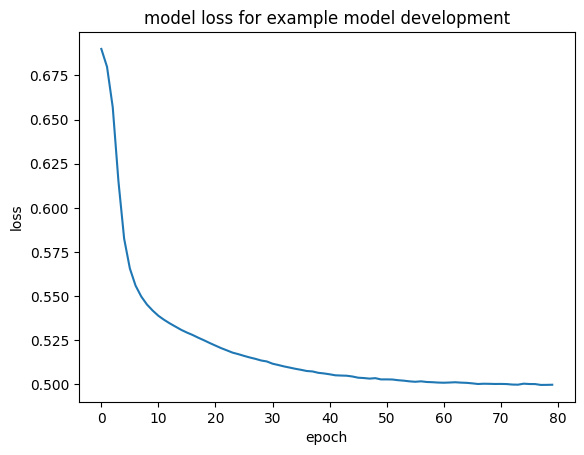

438/438 [==============================] - 1s 1ms/step - loss: 0.5042 - acc: 0.7525
Accuracy:  0.7525184154510498
438/438 [==============================] - 1s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4949  2033   6982
1.0        1431  5584   7015
All        6380  7617  13997



In [ ]:
#Network 2
#add another layer
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(10, input_dim=21, activation='relu'))
modeldl.add(Dense(10, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2)

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 - 1s - loss: 0.6219 - acc: 0.6836 - 998ms/epoch - 34ms/step
Epoch 2/80
29/29 - 0s - loss: 0.5432 - acc: 0.7309 - 101ms/epoch - 3ms/step
Epoch 3/80
29/29 - 0s - loss: 0.5291 - acc: 0.7389 - 102ms/epoch - 4ms/step
Epoch 4/80
29/29 - 0s - loss: 0.5221 - acc: 0.7428 - 102ms/epoch - 4ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5170 - acc: 0.7442 - 98ms/epoch - 3ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5127 - acc: 0.7473 - 101ms/epoch - 3ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5101 - acc: 0.7499 - 91ms/epoch - 3ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5080 - acc: 0.7500 - 98ms/epoch - 3ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5054 - acc: 0.7529 - 105ms/epoch - 4ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5037 - acc: 0.7546 - 90ms/epoch - 3ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5020 - acc: 0.7534 - 88ms/epoch - 3ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5009 - acc: 0.7558 - 93ms/epoch - 3ms/step
Epoch 13/80
29/29 - 0s - loss: 0.4996 - acc: 0.7557 - 87ms/epoch - 3ms/step
Epoch 14/80
29

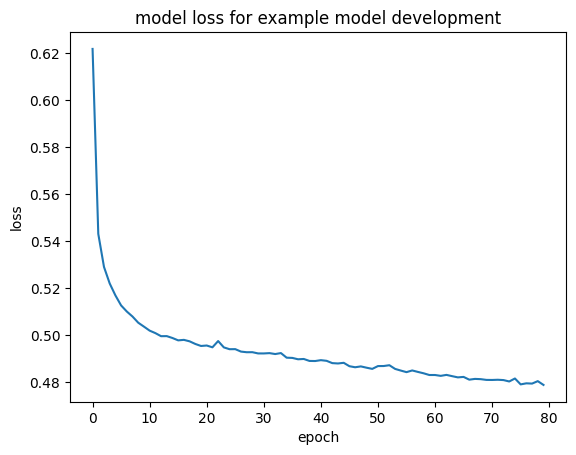

438/438 [==============================] - 1s 2ms/step - loss: 0.5093 - acc: 0.7494
Accuracy:  0.7494463324546814
438/438 [==============================] - 0s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4735  2247   6982
1.0        1260  5755   7015
All        5995  8002  13997



In [ ]:
#Network 3
#Back to network 2 and increase the number of perceptrons in the input layer and hidden layer
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(100, input_dim=21, activation='relu'))
modeldl.add(Dense(50, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2)

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 - 1s - loss: 0.6844 - acc: 0.5116 - 801ms/epoch - 28ms/step
Epoch 2/80
29/29 - 0s - loss: 0.6594 - acc: 0.6260 - 71ms/epoch - 2ms/step
Epoch 3/80
29/29 - 0s - loss: 0.6389 - acc: 0.6747 - 72ms/epoch - 2ms/step
Epoch 4/80
29/29 - 0s - loss: 0.6154 - acc: 0.7026 - 73ms/epoch - 3ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5891 - acc: 0.7166 - 69ms/epoch - 2ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5660 - acc: 0.7245 - 72ms/epoch - 2ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5500 - acc: 0.7299 - 74ms/epoch - 3ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5407 - acc: 0.7344 - 76ms/epoch - 3ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5343 - acc: 0.7365 - 69ms/epoch - 2ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5302 - acc: 0.7383 - 67ms/epoch - 2ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5271 - acc: 0.7406 - 69ms/epoch - 2ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5247 - acc: 0.7416 - 67ms/epoch - 2ms/step
Epoch 13/80
29/29 - 0s - loss: 0.5231 - acc: 0.7428 - 70ms/epoch - 2ms/step
Epoch 14/80
29/29 -

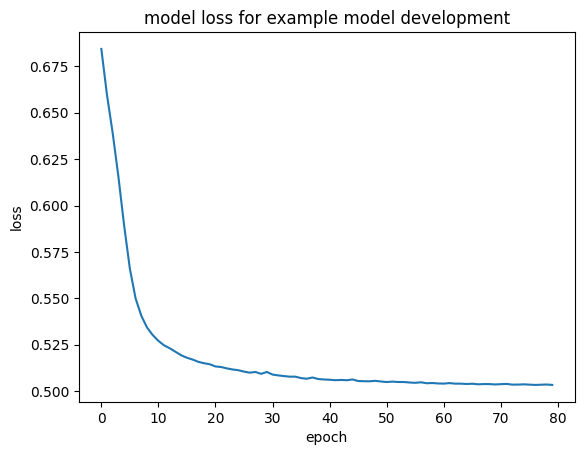

438/438 [==============================] - 1s 1ms/step - loss: 0.5078 - acc: 0.7496
Accuracy:  0.749589204788208
438/438 [==============================] - 0s 996us/step
Predicted     0     1    All
Actual                      
0.0        4713  2269   6982
1.0        1236  5779   7015
All        5949  8048  13997



In [ ]:
#Network 4
#Back to network 2 and add another hidden layer
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(10, input_dim=21, activation='relu'))
modeldl.add(Dense(10, activation='relu'))
modeldl.add(Dense(5, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2)

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 - 2s - loss: 0.6882 - acc: 0.5360 - 2s/epoch - 55ms/step
Epoch 2/80
29/29 - 0s - loss: 0.6630 - acc: 0.6479 - 82ms/epoch - 3ms/step
Epoch 3/80
29/29 - 0s - loss: 0.6290 - acc: 0.6970 - 78ms/epoch - 3ms/step
Epoch 4/80
29/29 - 0s - loss: 0.5951 - acc: 0.7101 - 75ms/epoch - 3ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5685 - acc: 0.7192 - 75ms/epoch - 3ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5538 - acc: 0.7249 - 75ms/epoch - 3ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5459 - acc: 0.7296 - 73ms/epoch - 3ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5407 - acc: 0.7324 - 87ms/epoch - 3ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5359 - acc: 0.7347 - 95ms/epoch - 3ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5319 - acc: 0.7364 - 95ms/epoch - 3ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5287 - acc: 0.7388 - 83ms/epoch - 3ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5261 - acc: 0.7406 - 83ms/epoch - 3ms/step
Epoch 13/80
29/29 - 0s - loss: 0.5239 - acc: 0.7416 - 81ms/epoch - 3ms/step
Epoch 14/80
29/29 - 0s

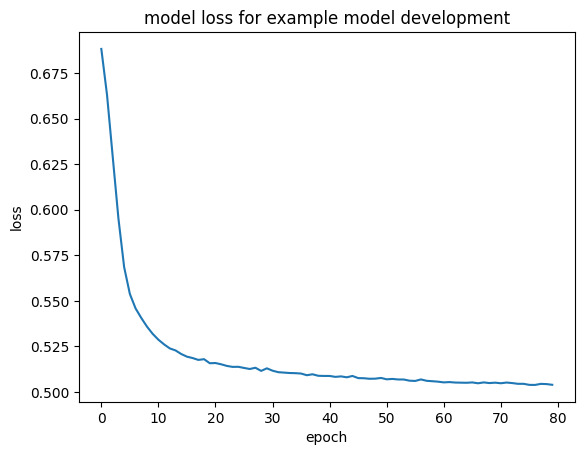

438/438 [==============================] - 1s 1ms/step - loss: 0.5092 - acc: 0.7496
Accuracy:  0.749589204788208
438/438 [==============================] - 0s 966us/step
Predicted     0     1    All
Actual                      
0.0        4677  2305   6982
1.0        1200  5815   7015
All        5877  8120  13997



In [ ]:
#Network 5
#Keep network 4 and add another hidden layer
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(10, input_dim=21, activation='relu'))
modeldl.add(Dense(10, activation='relu'))
modeldl.add(Dense(10, activation='relu'))
modeldl.add(Dense(10, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2)

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 - 1s - loss: 0.6775 - acc: 0.5655 - 1s/epoch - 37ms/step
Epoch 2/80
29/29 - 0s - loss: 0.6502 - acc: 0.6582 - 62ms/epoch - 2ms/step
Epoch 3/80
29/29 - 0s - loss: 0.6318 - acc: 0.6928 - 58ms/epoch - 2ms/step
Epoch 4/80
29/29 - 0s - loss: 0.6137 - acc: 0.7039 - 54ms/epoch - 2ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5926 - acc: 0.7102 - 57ms/epoch - 2ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5708 - acc: 0.7190 - 53ms/epoch - 2ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5531 - acc: 0.7275 - 52ms/epoch - 2ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5424 - acc: 0.7334 - 55ms/epoch - 2ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5358 - acc: 0.7370 - 55ms/epoch - 2ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5307 - acc: 0.7391 - 55ms/epoch - 2ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5274 - acc: 0.7402 - 55ms/epoch - 2ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5249 - acc: 0.7418 - 59ms/epoch - 2ms/step
Epoch 13/80
29/29 - 0s - loss: 0.5227 - acc: 0.7417 - 58ms/epoch - 2ms/step
Epoch 14/80
29/29 - 0s

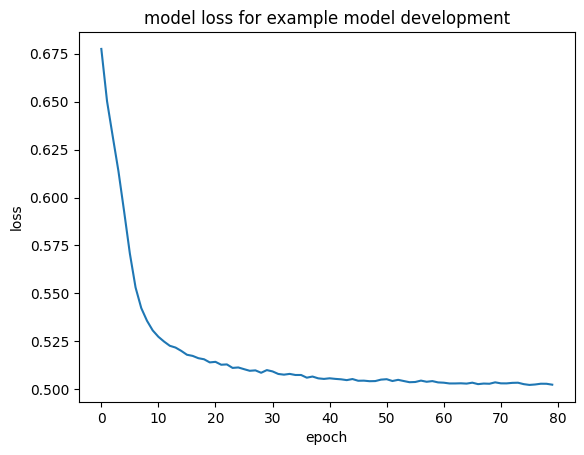

438/438 [==============================] - 1s 1ms/step - loss: 0.5078 - acc: 0.7483
Accuracy:  0.748303234577179
438/438 [==============================] - 0s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4617  2365   6982
1.0        1158  5857   7015
All        5775  8222  13997



In [ ]:
#Network 6
#Keep network 5 and add one hidden layer
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(10, input_dim=21, activation='relu'))
modeldl.add(Dense(10, activation='relu'))
modeldl.add(Dense(10, activation='relu'))
modeldl.add(Dense(10, activation='relu'))
modeldl.add(Dense(10, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2)

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 - 1s - loss: 0.6672 - acc: 0.6202 - 938ms/epoch - 32ms/step
Epoch 2/80
29/29 - 0s - loss: 0.6174 - acc: 0.7007 - 70ms/epoch - 2ms/step
Epoch 3/80
29/29 - 0s - loss: 0.5769 - acc: 0.7175 - 73ms/epoch - 3ms/step
Epoch 4/80
29/29 - 0s - loss: 0.5531 - acc: 0.7256 - 75ms/epoch - 3ms/step
Epoch 5/80
29/29 - 0s - loss: 0.5427 - acc: 0.7312 - 73ms/epoch - 3ms/step
Epoch 6/80
29/29 - 0s - loss: 0.5357 - acc: 0.7356 - 74ms/epoch - 3ms/step
Epoch 7/80
29/29 - 0s - loss: 0.5307 - acc: 0.7383 - 72ms/epoch - 2ms/step
Epoch 8/80
29/29 - 0s - loss: 0.5270 - acc: 0.7391 - 71ms/epoch - 2ms/step
Epoch 9/80
29/29 - 0s - loss: 0.5239 - acc: 0.7419 - 82ms/epoch - 3ms/step
Epoch 10/80
29/29 - 0s - loss: 0.5214 - acc: 0.7429 - 77ms/epoch - 3ms/step
Epoch 11/80
29/29 - 0s - loss: 0.5192 - acc: 0.7450 - 79ms/epoch - 3ms/step
Epoch 12/80
29/29 - 0s - loss: 0.5174 - acc: 0.7461 - 69ms/epoch - 2ms/step
Epoch 13/80
29/29 - 0s - loss: 0.5163 - acc: 0.7466 - 68ms/epoch - 2ms/step
Epoch 14/80
29/29 -

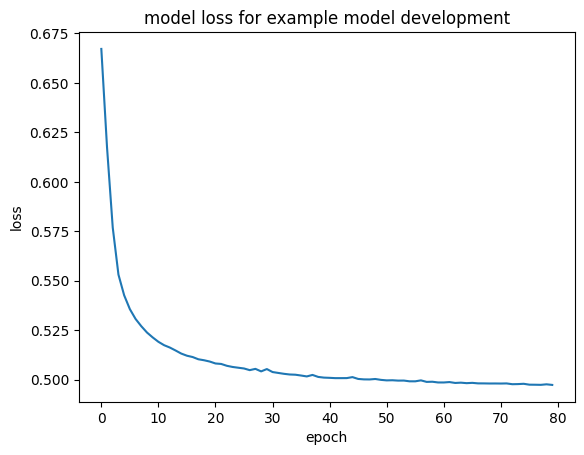

438/438 [==============================] - 1s 1ms/step - loss: 0.5052 - acc: 0.7517
Accuracy:  0.7516610622406006
438/438 [==============================] - 0s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4782  2200   6982
1.0        1276  5739   7015
All        6058  7939  13997



In [ ]:
#Network 7
#Back to network 2 and increase number of perceptrons in hidden layers
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(20, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=2)

plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
29/29 [==============================] - 2s 16ms/step - loss: 0.6851 - acc: 0.5799 - val_loss: 0.6457 - val_acc: 0.6749
Epoch 2/80
29/29 [==============================] - 0s 5ms/step - loss: 0.6151 - acc: 0.7006 - val_loss: 0.5805 - val_acc: 0.7152
Epoch 3/80
29/29 [==============================] - 0s 5ms/step - loss: 0.5603 - acc: 0.7225 - val_loss: 0.5495 - val_acc: 0.7258
Epoch 4/80
29/29 [==============================] - 0s 7ms/step - loss: 0.5436 - acc: 0.7276 - val_loss: 0.5405 - val_acc: 0.7297
Epoch 5/80
29/29 [==============================] - 0s 7ms/step - loss: 0.5370 - acc: 0.7342 - val_loss: 0.5359 - val_acc: 0.7311
Epoch 6/80
29/29 [==============================] - 0s 5ms/step - loss: 0.5320 - acc: 0.7365 - val_loss: 0.5318 - val_acc: 0.7347
Epoch 7/80
29/29 [==============================] - 0s 5ms/step - loss: 0.5285 - acc: 0.7399 - val_loss: 0.5279 - val_acc: 0.7349
Epoch 8/80
29/29 [==============================] - 0s 6ms/step - loss: 0.5255 - acc: 0.7

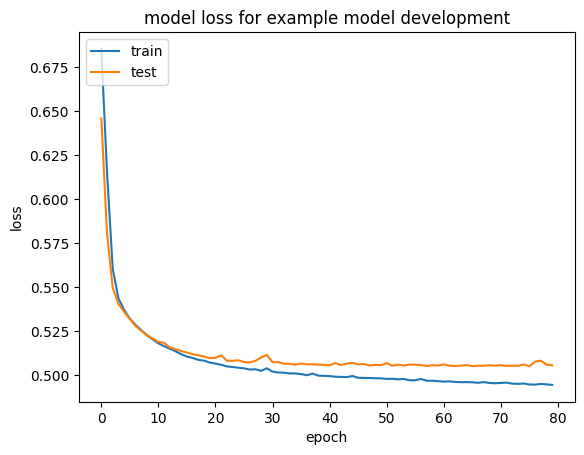

438/438 [==============================] - 1s 1ms/step - loss: 0.5056 - acc: 0.7534
Accuracy:  0.7534471750259399
438/438 [==============================] - 1s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4786  2196   6982
1.0        1255  5760   7015
All        6041  7956  13997



In [ ]:
#Network 8
#Keep network 7, change number of perceptrons
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))


modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

For the training of hyperparameters, start with batch size, using a suitable number of epochs.

Epoch 1/20
28418/28418 [==============================] - 55s 2ms/step - loss: 0.5316 - acc: 0.7369 - val_loss: 0.5206 - val_acc: 0.7433
Epoch 2/20
28418/28418 [==============================] - 62s 2ms/step - loss: 0.5155 - acc: 0.7453 - val_loss: 0.5121 - val_acc: 0.7452
Epoch 3/20
28418/28418 [==============================] - 53s 2ms/step - loss: 0.5121 - acc: 0.7490 - val_loss: 0.5096 - val_acc: 0.7477
Epoch 4/20
28418/28418 [==============================] - 60s 2ms/step - loss: 0.5102 - acc: 0.7491 - val_loss: 0.5090 - val_acc: 0.7491
Epoch 5/20
28418/28418 [==============================] - 53s 2ms/step - loss: 0.5082 - acc: 0.7515 - val_loss: 0.5078 - val_acc: 0.7474
Epoch 6/20
28418/28418 [==============================] - 59s 2ms/step - loss: 0.5065 - acc: 0.7514 - val_loss: 0.5092 - val_acc: 0.7480
Epoch 7/20
28418/28418 [==============================] - 54s 2ms/step - loss: 0.5064 - acc: 0.7507 - val_loss: 0.5130 - val_acc: 0.7487
Epoch 8/20
28418/28418 [=================

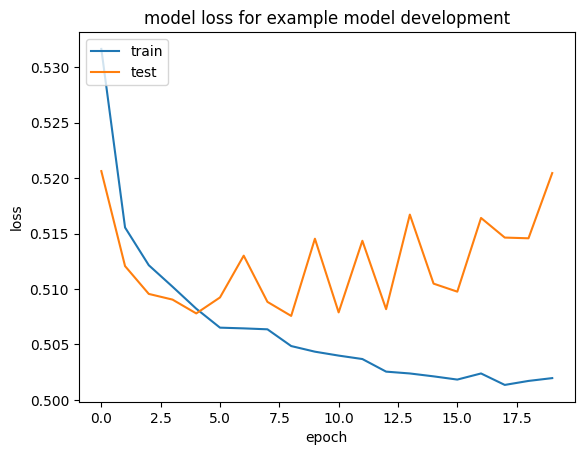

438/438 [==============================] - 1s 1ms/step - loss: 0.5205 - acc: 0.7459
Accuracy:  0.7458741068840027
438/438 [==============================] - 0s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4376  2606   6982
1.0         951  6064   7015
All        5327  8670  13997



In [ ]:
#Network 8
# Batch size 32
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))


modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
889/889 [==============================] - 4s 4ms/step - loss: 0.5486 - acc: 0.7271 - val_loss: 0.5248 - val_acc: 0.7397
Epoch 2/80
889/889 [==============================] - 2s 2ms/step - loss: 0.5211 - acc: 0.7440 - val_loss: 0.5159 - val_acc: 0.7426
Epoch 3/80
889/889 [==============================] - 2s 2ms/step - loss: 0.5135 - acc: 0.7482 - val_loss: 0.5115 - val_acc: 0.7460
Epoch 4/80
889/889 [==============================] - 2s 2ms/step - loss: 0.5105 - acc: 0.7485 - val_loss: 0.5121 - val_acc: 0.7476
Epoch 5/80
889/889 [==============================] - 2s 2ms/step - loss: 0.5076 - acc: 0.7502 - val_loss: 0.5097 - val_acc: 0.7488
Epoch 6/80
889/889 [==============================] - 3s 3ms/step - loss: 0.5061 - acc: 0.7514 - val_loss: 0.5071 - val_acc: 0.7506
Epoch 7/80
889/889 [==============================] - 3s 3ms/step - loss: 0.5048 - acc: 0.7531 - val_loss: 0.5070 - val_acc: 0.7494
Epoch 8/80
889/889 [==============================] - 2s 2ms/step - loss: 0.

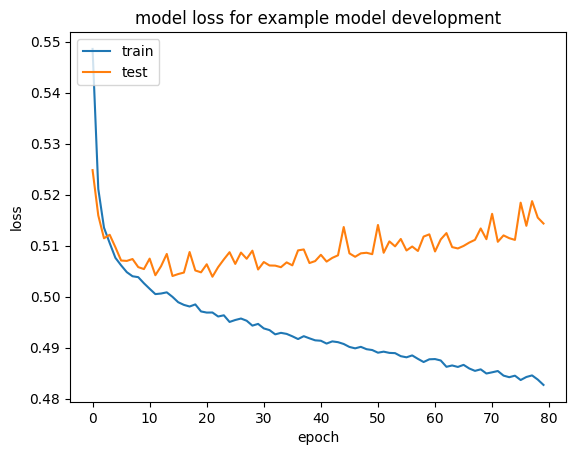

438/438 [==============================] - 1s 1ms/step - loss: 0.5143 - acc: 0.7481
Accuracy:  0.7480888962745667
438/438 [==============================] - 1s 1ms/step
Predicted     0     1    All
Actual                      
0.0        5076  1906   6982
1.0        1620  5395   7015
All        6696  7301  13997



In [ ]:
#Network 8
# Batch size 32
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))


modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=32, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
56/56 [==============================] - 2s 6ms/step - loss: 0.6703 - acc: 0.6016 - val_loss: 0.6022 - val_acc: 0.6910
Epoch 2/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5723 - acc: 0.7110 - val_loss: 0.5512 - val_acc: 0.7268
Epoch 3/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5398 - acc: 0.7338 - val_loss: 0.5356 - val_acc: 0.7337
Epoch 4/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5297 - acc: 0.7373 - val_loss: 0.5296 - val_acc: 0.7349
Epoch 5/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5248 - acc: 0.7404 - val_loss: 0.5250 - val_acc: 0.7388
Epoch 6/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5212 - acc: 0.7431 - val_loss: 0.5220 - val_acc: 0.7402
Epoch 7/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5184 - acc: 0.7451 - val_loss: 0.5209 - val_acc: 0.7394
Epoch 8/80
56/56 [==============================] - 0s 3ms/step - loss: 0.5167 - acc: 0.74

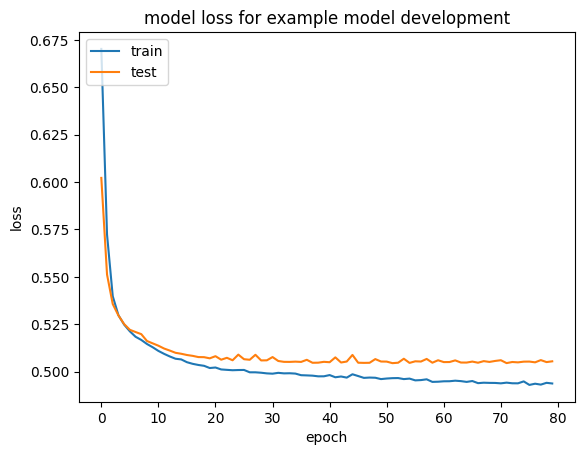

438/438 [==============================] - 1s 2ms/step - loss: 0.5054 - acc: 0.7539
Accuracy:  0.7539472579956055
438/438 [==============================] - 1s 2ms/step
Predicted     0     1    All
Actual                      
0.0        4837  2145   6982
1.0        1299  5716   7015
All        6136  7861  13997



In [ ]:
#Network 8
# Batch size 512
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=512, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
41/41 [==============================] - 2s 8ms/step - loss: 0.6537 - acc: 0.6379 - val_loss: 0.5918 - val_acc: 0.7137
Epoch 2/80
41/41 [==============================] - 0s 4ms/step - loss: 0.5628 - acc: 0.7214 - val_loss: 0.5467 - val_acc: 0.7275
Epoch 3/80
41/41 [==============================] - 0s 3ms/step - loss: 0.5406 - acc: 0.7306 - val_loss: 0.5359 - val_acc: 0.7310
Epoch 4/80
41/41 [==============================] - 0s 3ms/step - loss: 0.5327 - acc: 0.7362 - val_loss: 0.5308 - val_acc: 0.7354
Epoch 5/80
41/41 [==============================] - 0s 3ms/step - loss: 0.5279 - acc: 0.7381 - val_loss: 0.5263 - val_acc: 0.7352
Epoch 6/80
41/41 [==============================] - 0s 3ms/step - loss: 0.5242 - acc: 0.7409 - val_loss: 0.5230 - val_acc: 0.7384
Epoch 7/80
41/41 [==============================] - 0s 4ms/step - loss: 0.5212 - acc: 0.7419 - val_loss: 0.5201 - val_acc: 0.7404
Epoch 8/80
41/41 [==============================] - 0s 4ms/step - loss: 0.5185 - acc: 0.74

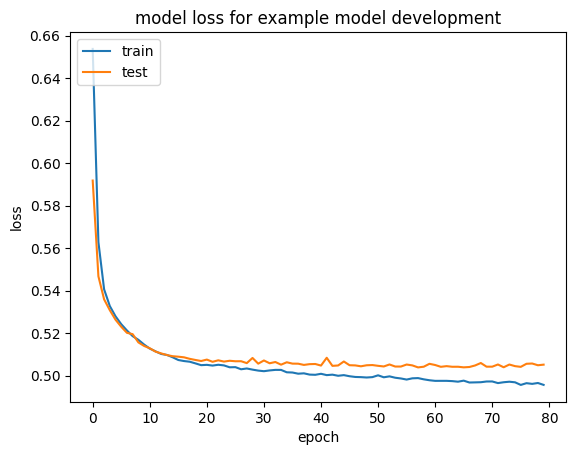

438/438 [==============================] - 1s 1ms/step - loss: 0.5051 - acc: 0.7509
Accuracy:  0.7508751749992371
438/438 [==============================] - 1s 2ms/step
Predicted     0     1    All
Actual                      
0.0        4702  2280   6982
1.0        1207  5808   7015
All        5909  8088  13997



In [ ]:
#Network 8
# Batch size 700
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=700, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/80
95/95 [==============================] - 1s 4ms/step - loss: 0.6032 - acc: 0.6794 - val_loss: 0.5522 - val_acc: 0.7225
Epoch 2/80
95/95 [==============================] - 0s 2ms/step - loss: 0.5383 - acc: 0.7341 - val_loss: 0.5308 - val_acc: 0.7339
Epoch 3/80
95/95 [==============================] - 0s 2ms/step - loss: 0.5260 - acc: 0.7415 - val_loss: 0.5245 - val_acc: 0.7369
Epoch 4/80
95/95 [==============================] - 0s 2ms/step - loss: 0.5212 - acc: 0.7446 - val_loss: 0.5202 - val_acc: 0.7403
Epoch 5/80
95/95 [==============================] - 0s 2ms/step - loss: 0.5176 - acc: 0.7448 - val_loss: 0.5223 - val_acc: 0.7416
Epoch 6/80
95/95 [==============================] - 0s 4ms/step - loss: 0.5154 - acc: 0.7470 - val_loss: 0.5166 - val_acc: 0.7435
Epoch 7/80
95/95 [==============================] - 0s 4ms/step - loss: 0.5128 - acc: 0.7489 - val_loss: 0.5147 - val_acc: 0.7437
Epoch 8/80
95/95 [==============================] - 0s 4ms/step - loss: 0.5112 - acc: 0.74

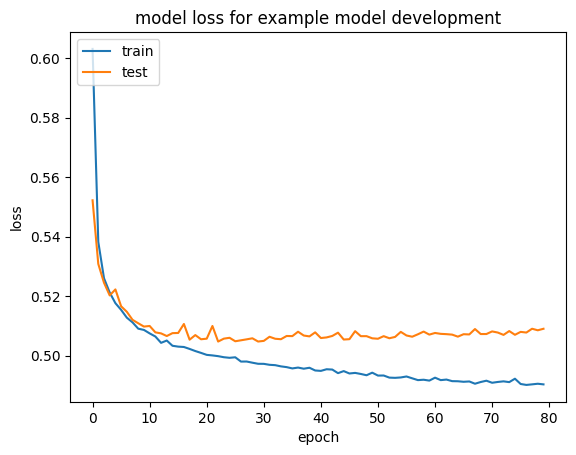

438/438 [==============================] - 1s 1ms/step - loss: 0.5090 - acc: 0.7475
Accuracy:  0.7475173473358154
438/438 [==============================] - 0s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4650  2332   6982
1.0        1202  5813   7015
All        5852  8145  13997



In [ ]:
#Network 8
# Batch size 300
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=300, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/500
3/3 [==============================] - 1s 96ms/step - loss: 0.7119 - acc: 0.4641 - val_loss: 0.7037 - val_acc: 0.4790
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 0.6982 - acc: 0.4916 - val_loss: 0.6905 - val_acc: 0.5110
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6855 - acc: 0.5267 - val_loss: 0.6784 - val_acc: 0.5532
Epoch 4/500
3/3 [==============================] - 0s 26ms/step - loss: 0.6739 - acc: 0.5685 - val_loss: 0.6673 - val_acc: 0.6028
Epoch 5/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6634 - acc: 0.6152 - val_loss: 0.6571 - val_acc: 0.6347
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 0.6537 - acc: 0.6420 - val_loss: 0.6478 - val_acc: 0.6504
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6447 - acc: 0.6586 - val_loss: 0.6393 - val_acc: 0.6629
Epoch 8/500
3/3 [==============================] - 0s 28ms/step - loss: 0.6365 - acc: 0.67

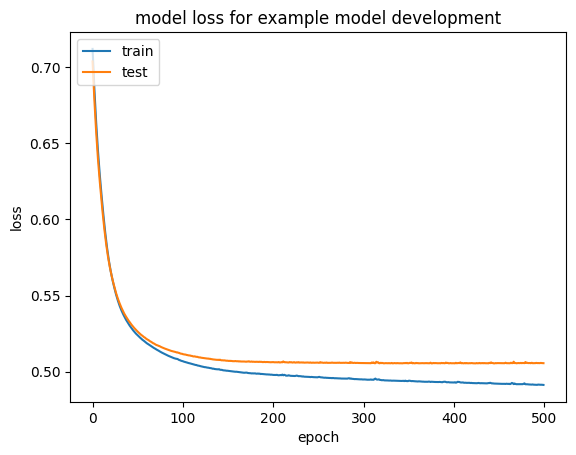

438/438 [==============================] - 1s 1ms/step - loss: 0.5056 - acc: 0.7547
Accuracy:  0.7546617388725281
438/438 [==============================] - 1s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4900  2082   6982
1.0        1352  5663   7015
All        6252  7745  13997



In [ ]:
#Network 8
# Batch size 10000
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=500, batch_size=10000, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.6901 - acc: 0.5167 - val_loss: 0.6875 - val_acc: 0.5264
Epoch 2/1000
1/1 [==============================] - 0s 190ms/step - loss: 0.6879 - acc: 0.5232 - val_loss: 0.6853 - val_acc: 0.5338
Epoch 3/1000
1/1 [==============================] - 0s 171ms/step - loss: 0.6856 - acc: 0.5310 - val_loss: 0.6831 - val_acc: 0.5426
Epoch 4/1000
1/1 [==============================] - 0s 118ms/step - loss: 0.6834 - acc: 0.5394 - val_loss: 0.6809 - val_acc: 0.5532
Epoch 5/1000
1/1 [==============================] - 0s 112ms/step - loss: 0.6812 - acc: 0.5498 - val_loss: 0.6787 - val_acc: 0.5645
Epoch 6/1000
1/1 [==============================] - 0s 163ms/step - loss: 0.6791 - acc: 0.5616 - val_loss: 0.6765 - val_acc: 0.5794
Epoch 7/1000
1/1 [==============================] - 0s 152ms/step - loss: 0.6769 - acc: 0.5761 - val_loss: 0.6743 - val_acc: 0.5930
Epoch 8/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.6747

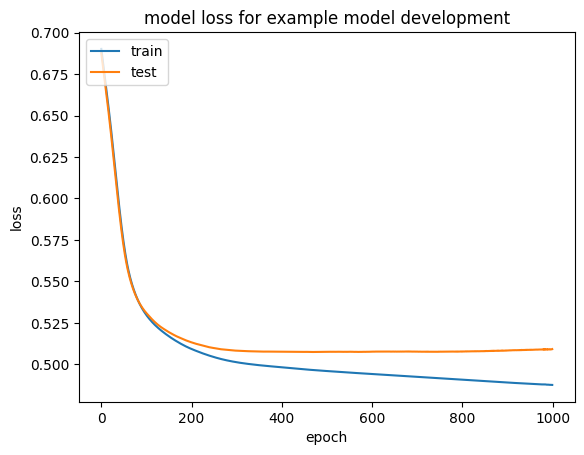

438/438 [==============================] - 1s 1ms/step - loss: 0.5092 - acc: 0.7511
Accuracy:  0.7510895133018494
438/438 [==============================] - 1s 1ms/step
Predicted     0     1    All
Actual                      
0.0        4983  1999   6982
1.0        1485  5530   7015
All        6468  7529  13997



In [ ]:
#Network 8
# Batch size 10000
tf.random.set_seed(seed)

modeldl = Sequential()

modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))

modeldl.add(Dense(1, activation='sigmoid'))


modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
results = modeldl.fit(X_train, Y_train, epochs=1000, batch_size=100000, verbose=1, validation_data=(X_test, Y_test))

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("Accuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

Best batch sizes are 512, 700, 1000 and 10000. Keep the 10000 for now.
Now testing different activation functions in the hidden layer.

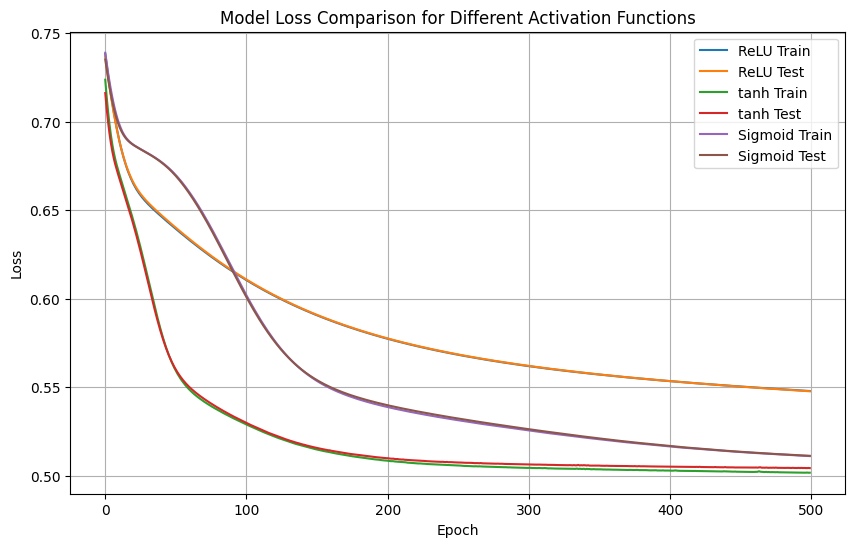

438/438 [==============================] - 1s 1ms/step - loss: 0.5478 - acc: 0.7249
ReLU Model Accuracy:  0.724941074848175
438/438 [==============================] - 1s 1ms/step - loss: 0.5044 - acc: 0.7530
tanh Model Accuracy:  0.7530184984207153
438/438 [==============================] - 1s 1ms/step - loss: 0.5114 - acc: 0.7482
Sigmoid Model Accuracy:  0.7482317686080933


In [ ]:
#Network 8
# Activation functions test
tf.random.set_seed(seed)

# ReLU activation function
model_relu = Sequential()
modeldl.add(Dense(30, input_dim=21, activation='relu'))
modeldl.add(Dense(20, activation='relu'))
model_relu.add(Dense(1, activation='sigmoid'))
model_relu.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_relu = model_relu.fit(X_train, Y_train, epochs=500, batch_size=10000, verbose=0, validation_data=(X_test, Y_test))

# tanh activation function
model_tanh = Sequential()
model_tanh.add(Dense(10, input_dim=21, activation='tanh'))
model_tanh.add(Dense(10, activation='tanh'))
model_tanh.add(Dense(1, activation='sigmoid'))
model_tanh.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_tanh = model_tanh.fit(X_train, Y_train, epochs=500, batch_size=10000, verbose=0, validation_data=(X_test, Y_test))

# sigmoid activation function
model_sigmoid = Sequential()
model_sigmoid.add(Dense(10, input_dim=21, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='sigmoid'))
model_sigmoid.add(Dense(1, activation='sigmoid'))
model_sigmoid.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
results_sigmoid = model_sigmoid.fit(X_train, Y_train, epochs=500, batch_size=10000, verbose=0, validation_data=(X_test, Y_test))

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(results_relu.history['loss'], label='ReLU Train')
plt.plot(results_relu.history['val_loss'], label='ReLU Test')

plt.plot(results_tanh.history['loss'], label='tanh Train')
plt.plot(results_tanh.history['val_loss'], label='tanh Test')

plt.plot(results_sigmoid.history['loss'], label='Sigmoid Train')
plt.plot(results_sigmoid.history['val_loss'], label='Sigmoid Test')

plt.title('Model Loss Comparison for Different Activation Functions')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy evaluation
print("ReLU Model Accuracy: ", model_relu.evaluate(X_test,Y_test)[1])
print("tanh Model Accuracy: ", model_tanh.evaluate(X_test,Y_test)[1])
print("Sigmoid Model Accuracy: ", model_sigmoid.evaluate(X_test,Y_test)[1])

Relu is the worst activation function. Keep tanH as activation function in the hidden layer. Testing now different optimizers.

Epoch 1/500
3/3 [==============================] - 1s 82ms/step - loss: 0.8770 - acc: 0.4994 - val_loss: 0.8735 - val_acc: 0.4976
Epoch 2/500
3/3 [==============================] - 0s 26ms/step - loss: 0.8693 - acc: 0.4994 - val_loss: 0.8665 - val_acc: 0.4976
Epoch 3/500
3/3 [==============================] - 0s 19ms/step - loss: 0.8626 - acc: 0.4994 - val_loss: 0.8603 - val_acc: 0.4976
Epoch 4/500
3/3 [==============================] - 0s 27ms/step - loss: 0.8566 - acc: 0.4994 - val_loss: 0.8546 - val_acc: 0.4976
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.8511 - acc: 0.4994 - val_loss: 0.8494 - val_acc: 0.4976
Epoch 6/500
3/3 [==============================] - 0s 22ms/step - loss: 0.8460 - acc: 0.4994 - val_loss: 0.8444 - val_acc: 0.4976
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 0.8412 - acc: 0.4994 - val_loss: 0.8398 - val_acc: 0.4976
Epoch 8/500
3/3 [==============================] - 0s 28ms/step - loss: 0.8366 - acc: 0.49

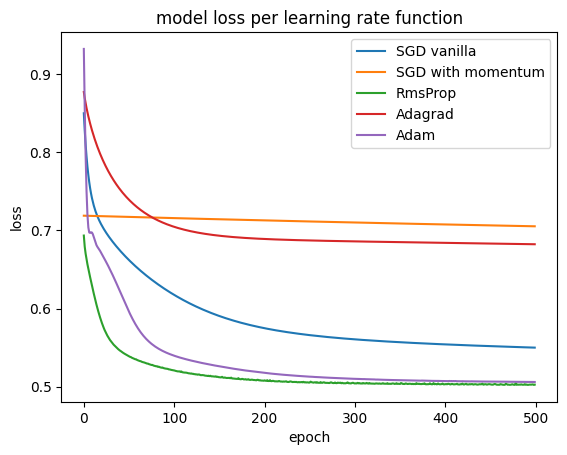

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.

# Sigmoid in the hidden layers
model = Sequential()
model.add(Dense(30, input_dim=21, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
resultsSgd = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10000, verbose=0, shuffle=True)

# Sigmoid in the hidden layers
model = Sequential()
model.add(Dense(30, input_dim=21, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))



opt = tf.keras.optimizers.SGD(
    learning_rate=0.00001,
    momentum=0.7
)
# Compile model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
resultsSgdM = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10000, verbose=0, shuffle=True)


# Tan H in the hidden layers
model = Sequential()
model.add(Dense(10, input_dim=21, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
resultsRmsprop = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10000, verbose=0, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=21, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adagrad", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
resultsAdagrad = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10000, verbose=1, shuffle=True)


model = Sequential()
model.add(Dense(30, input_dim=21, activation='sigmoid'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
resultsAdam = model.fit(X, Y, validation_split=0.33, epochs=500, batch_size=10000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(resultsSgd.history['loss'])
#plt.plot(resultsSgdD.history['loss'])
plt.plot(resultsSgdM.history['loss'])
plt.plot(resultsRmsprop.history['loss'])
plt.plot(resultsAdagrad.history['loss'])
plt.plot(resultsAdam.history['loss'])
plt.title('model loss per learning rate function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['SGD vanilla', 'SGD with momentum', 'RmsProp', 'Adagrad', 'Adam'], loc='upper right')
plt.show()

Best result given by RmsProp.
Regularization techniques. Now applying dropout and weight initializer.

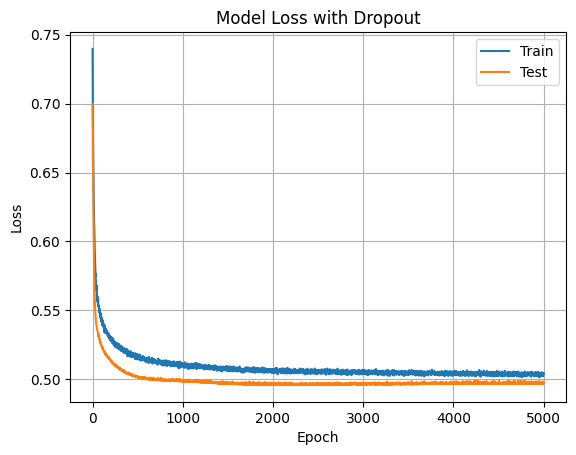

438/438 [==============================] - 1s 1ms/step - loss: 0.5047 - acc: 0.7531
Model Accuracy:  0.753089964389801


In [ ]:
from tensorflow.keras.layers import Dropout

# Testing the model with dropout
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.

model = Sequential()
model.add(Dense(30, input_dim=21, activation='tanh'))
model.add(Dropout(0.5))  # Adding dropout after the first hidden layer
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=10000, verbose=0, shuffle=True)

plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')

plt.title('Model Loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy evaluation
print("Model Accuracy: ", model.evaluate(X_test,Y_test)[1])

Epoch 1/500
2/2 [==============================] - 1s 269ms/step - loss: 0.7372 - acc: 0.4364 - val_loss: 0.7145 - val_acc: 0.4846
Epoch 2/500
2/2 [==============================] - 0s 105ms/step - loss: 0.7062 - acc: 0.5014 - val_loss: 0.6940 - val_acc: 0.5403
Epoch 3/500
2/2 [==============================] - 0s 61ms/step - loss: 0.6876 - acc: 0.5462 - val_loss: 0.6784 - val_acc: 0.5761
Epoch 4/500
2/2 [==============================] - 0s 53ms/step - loss: 0.6731 - acc: 0.5800 - val_loss: 0.6653 - val_acc: 0.5959
Epoch 5/500
2/2 [==============================] - 0s 94ms/step - loss: 0.6606 - acc: 0.6069 - val_loss: 0.6534 - val_acc: 0.6273
Epoch 6/500
2/2 [==============================] - 0s 49ms/step - loss: 0.6494 - acc: 0.6326 - val_loss: 0.6427 - val_acc: 0.6517
Epoch 7/500
2/2 [==============================] - 0s 71ms/step - loss: 0.6393 - acc: 0.6584 - val_loss: 0.6327 - val_acc: 0.6746
Epoch 8/500
2/2 [==============================] - 0s 67ms/step - loss: 0.6299 - acc: 0.

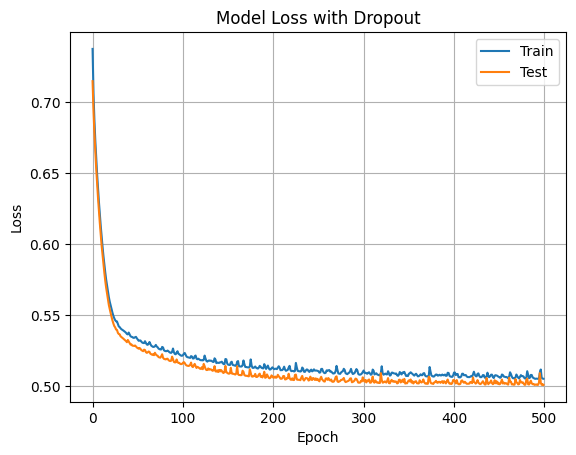

438/438 [==============================] - 1s 1ms/step - loss: 0.5066 - acc: 0.7513
Model Accuracy:  0.7513038516044617


In [ ]:
# Testing the model with normal distribution as weight initialization
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.

model = Sequential()
model.add(Dense(30, input_dim=21, activation='tanh', kernel_initializer="GlorotNormal"))
model.add(Dense(20, activation='tanh', kernel_initializer="GlorotNormal"))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(X_train, Y_train, validation_split=0.33, epochs=500, batch_size=10000, verbose=1, shuffle=True)

plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')

plt.title('Model Loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy evaluation
print("Model Accuracy: ", model.evaluate(X_test,Y_test)[1])

No significant improvement in the accuracy, keeping the model without dropout or weight initialization.

Now performing the Grid Search.

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
import numpy as np
import tensorflow as tf

np.random.seed(seed)
tf.random.set_seed(seed)

def gs_model(optimizerIn='adam', initIn='GlorotUniform'):
    model = Sequential()
    model.add(Dense(30, input_dim=21, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizerIn, metrics=['acc'])
    return model

model = KerasClassifier(build_fn=gs_model)

# Grid search parameters
optimizers = ['rmsprop', 'adam']
batches = [512, 700, 1000, 10000]
inits = ['normal', 'uniform']
epochs = [500]

# Checkpointing
checkpoint = ModelCheckpoint("myBest.hdf5", monitor='acc', save_best_only=True, mode="max", verbose=1)
earlystopping = EarlyStopping(monitor="loss",patience= 5)
callbacks_list = [checkpoint, earlystopping]


param_grid = dict(optimizerIn=optimizers, epochs=epochs, batch_size=batches, initIn=inits)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y, callbacks=callbacks_list)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<ipython-input-74-0a2fe641abcb>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=gs_model)


Streaming output truncated to the last 5000 lines.
Epoch 107: acc did not improve from 0.75958
34/34 [==============================] - 0s 4ms/step - loss: 0.4995 - acc: 0.7558
Epoch 108/500
19/34 [===============>..............] - ETA: 0s - loss: 0.4971 - acc: 0.7565
Epoch 108: acc did not improve from 0.75958
34/34 [==============================] - 0s 3ms/step - loss: 0.5000 - acc: 0.7555
Epoch 109/500
18/34 [==============>...............] - ETA: 0s - loss: 0.4937 - acc: 0.7577
Epoch 109: acc did not improve from 0.75958
34/34 [==============================] - 0s 3ms/step - loss: 0.4992 - acc: 0.7557
Epoch 110/500
18/34 [==============>...............] - ETA: 0s - loss: 0.4982 - acc: 0.7570
Epoch 110: acc did not improve from 0.75958
34/34 [==============================] - 0s 3ms/step - loss: 0.4993 - acc: 0.7557
Epoch 111/500
18/34 [==============>...............] - ETA: 0s - loss: 0.4999 - acc: 0.7546
Epoch 111: acc did not improve from 0.75958
34/34 [==========================

1/1 [==============================] - 0s 239ms/step - loss: 0.5158 - acc: 0.7460
Epoch 1/500
1/4 [======>.......................] - ETA: 2s - loss: 0.7509 - acc: 0.4956
Epoch 1: acc did not improve from 0.75958
4/4 [==============================] - 1s 17ms/step - loss: 0.7072 - acc: 0.5319
Epoch 2/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6592 - acc: 0.6120
Epoch 2: acc did not improve from 0.75958
4/4 [==============================] - 0s 13ms/step - loss: 0.6516 - acc: 0.6339
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6361 - acc: 0.6603
Epoch 3: acc did not improve from 0.75958
4/4 [==============================] - 0s 12ms/step - loss: 0.6264 - acc: 0.6738
Epoch 4/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6153 - acc: 0.6860
Epoch 4: acc did not improve from 0.75958
4/4 [==============================] - 0s 12ms/step - loss: 0.6087 - acc: 0.6919
Epoch 5/500
1/4 [======>.......................] - ETA: 0s - loss: 0.6002 

Streaming output truncated to the last 5000 lines.
1/4 [======>.......................] - ETA: 0s - loss: 0.5105 - acc: 0.7468
Epoch 128: acc did not improve from 0.75958
4/4 [==============================] - 0s 13ms/step - loss: 0.5101 - acc: 0.7475
Epoch 129/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5128 - acc: 0.7442
Epoch 129: acc did not improve from 0.75958
4/4 [==============================] - 0s 11ms/step - loss: 0.5130 - acc: 0.7456
Epoch 130/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5100 - acc: 0.7482
Epoch 130: acc did not improve from 0.75958
4/4 [==============================] - 0s 11ms/step - loss: 0.5093 - acc: 0.7493
Epoch 131/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5069 - acc: 0.7532
Epoch 131: acc did not improve from 0.75958
4/4 [==============================] - 0s 12ms/step - loss: 0.5103 - acc: 0.7474
Epoch 132/500
1/4 [======>.......................] - ETA: 0s - loss: 0.5170 - acc: 0.7460
Epoch 132: ac

Best: 0.754356 using {'batch_size': 512, 'epochs': 500, 'initIn': 'uniform', 'optimizerIn': 'adam'}

The best optimizer given from the Gridsearch is adam, batch size smaller than the previously selected one. The best weight initializer is a uniform distribution.
Now using these values for the model, but a smaller number of epochs (500 leads to overfitting).




Epoch 1/200
38/38 [==============================] - 1s 8ms/step - loss: 0.6898 - acc: 0.5981 - val_loss: 0.6000 - val_acc: 0.7097
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 0.5848 - acc: 0.7082 - val_loss: 0.5634 - val_acc: 0.7180
Epoch 3/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5643 - acc: 0.7150 - val_loss: 0.5513 - val_acc: 0.7223
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 0.5548 - acc: 0.7224 - val_loss: 0.5446 - val_acc: 0.7264
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 0.5485 - acc: 0.7262 - val_loss: 0.5388 - val_acc: 0.7312
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 0.5433 - acc: 0.7314 - val_loss: 0.5345 - val_acc: 0.7359
Epoch 7/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5391 - acc: 0.7334 - val_loss: 0.5312 - val_acc: 0.7366
Epoch 8/200
38/38 [==============================] - 0s 3ms/step - loss: 0.5360 - a

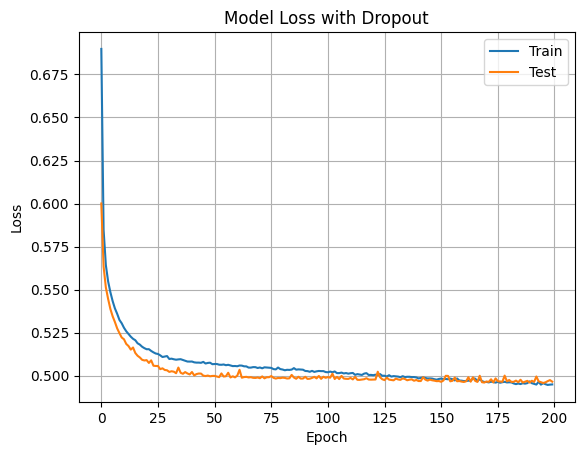

438/438 [==============================] - 1s 1ms/step - loss: 0.5028 - acc: 0.7522
Model Accuracy:  0.7522326111793518


In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.

model = Sequential()
model.add(Dense(30, input_dim=21, activation='tanh', kernel_initializer="GlorotUniform"))
model.add(Dense(20, activation='tanh', kernel_initializer="GlorotUniform"))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(X_train, Y_train, validation_split=0.33, epochs=200, batch_size=512, verbose=1, shuffle=True)

plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')

plt.title('Model Loss with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy evaluation
print("Model Accuracy: ", model.evaluate(X_test,Y_test)[1])

With the parameters obtained from the grid search a lower number of epochs was needed, otherwise the model was leading to overfitting (see the point around 160). Keeping the parameters obtained from the gridsearch to run the target group analysis on Smoking and Veggie.

In [ ]:
# definition to provide the metrics
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays
  act = np.array(act)
  pred = np.array(pred)
  for index, item in enumerate(act):
    if item == pred[index]:
      correct += 1
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2)
  print("Accuracy:", accuracy, "%")
  print(pd.crosstab( np.array(act),  np.array(pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

In [ ]:
# Smoker target groups

smoker_pred = []      #1
smoker_actual_class = []

nonsmoker_pred = []   #0
nonsmoker_actual_class = []


for index,row in enumerate(X_test):
    if row[4] == 1:
        smoker_pred.append(dl_y_pred[index])
        smoker_actual_class.append(Y_test[index])
    elif row[4] == 0:
        nonsmoker_pred.append(dl_y_pred[index])
        nonsmoker_actual_class.append(Y_test[index])

# Print the representation of each target group
print("Smoker instances in the test set:", len(smoker_pred))
print("Non smoker instances in the test set:  ", len(nonsmoker_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Smoker", smoker_actual_class, smoker_pred)
print("\n")
subMetrics("Non smoker", nonsmoker_actual_class, nonsmoker_pred)

Smoker instances in the test set: 6657
Non smoker instances in the test set:   7340



Metrics for:  Smoker
Accuracy: 73.91 %
Predicted     0     1   All
Actual                     
0.0        2101   907  3008
1.0         830  2819  3649
All        2931  3726  6657


Metrics for:  Non smoker
Accuracy: 76.1 %
Predicted     0     1   All
Actual                     
0.0        3087   887  3974
1.0         867  2499  3366
All        3954  3386  7340


In [ ]:
# Veggies target groups

veggie_pred = []      #1
veggie_actual_class = []

noveggie_pred = []   #0
noveggie_actual_class = []


# Populate the confusion matrix grouping by veggie (col index 9) you could also do this via group by but would need to convert back to pandas dataframe.
# When grouping by multi class, you will have to modify the below code to include multi class, as for this example there is only two.
# Also we are using the DT algorithm here, you can change this to DL if you selected that algorithm.
for index,row in enumerate(X_test):
    if row[9] == 1:
        veggie_pred.append(dl_y_pred[index])
        veggie_actual_class.append(Y_test[index])
    elif row[9] == 0:
        noveggie_pred.append(dl_y_pred[index])
        noveggie_actual_class.append(Y_test[index])

# Print the representation of each target group
print("Veggie instances in the test set:", len(veggie_pred))
print("No veggie instances in the test set:  ", len(noveggie_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Veggie", veggie_actual_class, veggie_pred)
print("\n")
subMetrics("No Veggie", noveggie_actual_class, noveggie_pred)

Veggie instances in the test set: 11021
No veggie instances in the test set:   2976



Metrics for:  Veggie
Accuracy: 75.12 %
Predicted     0     1    All
Actual                      
0.0        4371  1352   5723
1.0        1390  3908   5298
All        5761  5260  11021


Metrics for:  No Veggie
Accuracy: 74.83 %
Predicted     0     1   All
Actual                     
0.0         817   442  1259
1.0         307  1410  1717
All        1124  1852  2976


In [ ]:
# Calculate the proportion of the majority class in the training dataset
majority_class_proportion = np.sum(Y_train == 0) / len(Y_train)  # Assuming 0 is the majority class

# Predict the majority class for all instances in the test dataset
baseline_predictions = np.zeros_like(Y_test)  # Assuming 0 is the majority class

# Calculate accuracy of the baseline model
baseline_accuracy = np.mean(baseline_predictions == Y_test) * 100

print("Baseline Accuracy: {:.2f}%".format(baseline_accuracy))

Baseline Accuracy: 49.88%


## Conclusions
The model achieves ~75% accuracy on the validation set. Future improvements could include regularization, dropout, or more advanced architectures such as CNNs or ensemble models.
